**Jupyter Notebooks**

This document that you're currently reading is a "Jupyter Notebook", and you've probably heard about it before. It's like a text document, but you can run code on it! It can also display inline graphs, pull data from Databases or show excel spreadsheets live! Isn't it amazing? 😄

**Mildly interesting fact of the day:**

This is a really quick tutorial on how to get started with Jupyter notebooks (and lab). It shouldn't take more than 10 minutes and you'll be writing Python code right away.

**Part 1: everything is a cell**

Jupyter Notebooks are organized as a set of "cells". Each cell can contain different types of content: like Python code (or R, Julia, etc), images or even human readable text (markdown), like the one you're currently reading.

I've left a couple of empty cells below for you to see them:

This is another cell containing Markdown (human readable) code. And below, another empty cell:

You can edit these cells just by double clicking on them. Try editing the following cell:

**Part 2: Working with code**

Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple 2 + 2 before, so let's do something a little bit more interesting. First, we need to import numpy and matplotlib:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's now execute a few lines of code and generate some plots:

In [3]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

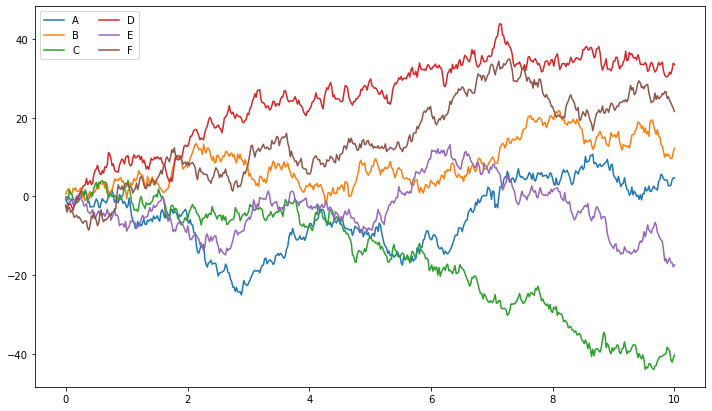

In [4]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

**Part 3: Interacting with data**

*Notebooks.ai and Jupyter Lab make it really simple to intereact with files in your local storage. These files are securely stored in the cloud and you can access them from anywhere in the world.

*To show you the full potential of Notebooks.ai, we're going to pull cryptocurrencies prices from a public API and download them as Excel files, pretty fancy 😎. I need to import two libraries first: requests (to pull data from the web) and pandas to process it.

In [5]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from Cryptowatch (for reference, check their docs).

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [9]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week
btc = get_historic_price('btc', 'bitstamp', after=last_week)
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

<AxesSubplot:xlabel='CloseTime'>

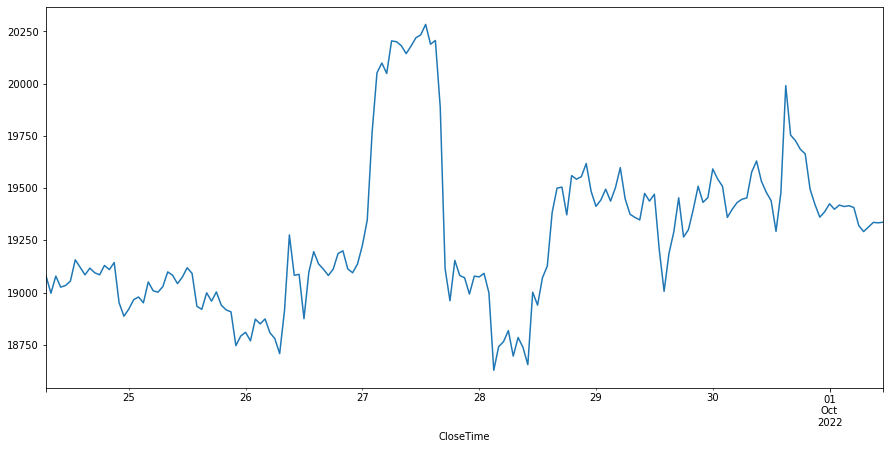

In [10]:
btc.head()
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

<AxesSubplot:xlabel='CloseTime'>

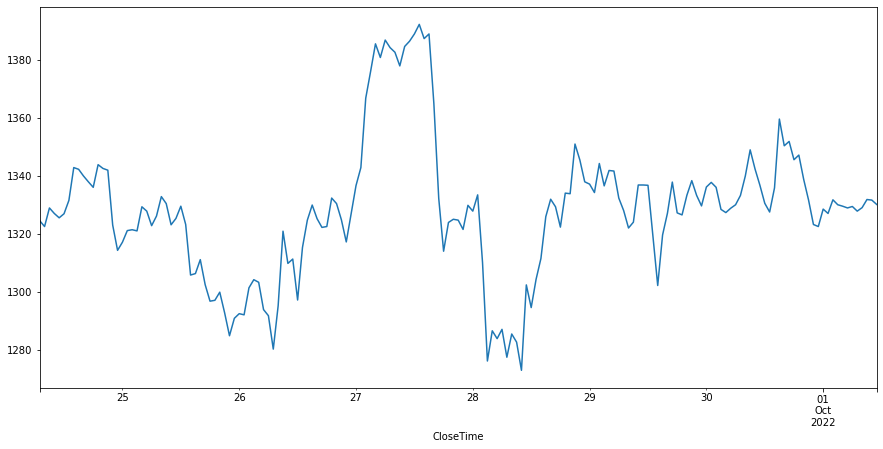

In [11]:
eth.head()
eth['ClosePrice'].plot(figsize=(15, 7))

**Bonus: Dynamic plots with Bokeh**


*We've also included Bokeh as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

*We first need to import the libraries:

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook

<function bokeh.io.output.output_notebook(resources=None, verbose=False, hide_banner=False, load_timeout=5000, notebook_type='jupyter')>

**And we generate the plot**

In [13]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')

p1.legend.location = "top_left"

show(p1)

**Part 4: Exporting to Excel**
    
*We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the pandas package:

In [14]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [15]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [16]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [17]:
writer.save()